<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">KANs for Class Incremental Learning
</h1>  
     
</div>

<div style="border-radius:10px; color:#000000; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>Overview</font></h3>
    
- Implementing a Kolmogorov-Arnold Network (KAN) for Class Incremental Learning.
- Comparing KAN against a neural network of similar architecture.
- Utilizing the MNIST dataset to define tasks.

# Import Packages


In [1]:
import torch
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

device = 'cpu'

## Loading the Dataset

In [19]:
digits = load_digits(n_class=10, as_frame=True)
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [20]:
data = digits.data.join(pd.to_numeric(digits.target))
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

<Axes: >

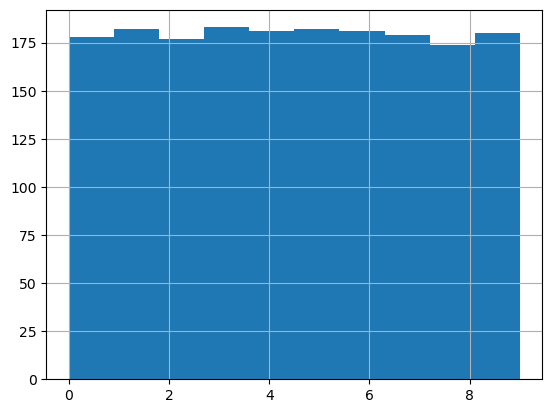

In [22]:
data.target.hist()

In [128]:
# Split dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)

In [129]:
train_data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1328,0.0,0.0,0.0,2.0,15.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,15.0,5.0,0.0,0.0,4
1562,0.0,0.0,0.0,7.0,16.0,16.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,3.0,0.0,0.0,0.0,9
750,0.0,0.0,0.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,5.0,11.0,13.0,12.0,2.0,6
1788,0.0,0.0,0.0,1.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,9.0,0.0,0.0,4
408,0.0,0.0,9.0,11.0,2.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,9.0,9.0,12.0,4.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.0,0.0,2.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,12.0,10.0,7.0,0.0,0.0,8
1791,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0,4
1096,0.0,0.0,7.0,12.0,11.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,12.0,16.0,13.0,2.0,0.0,9
235,0.0,0.0,0.0,0.0,10.0,13.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,13.0,16.0,1.0,0.0,1


<div style="border-radius:10px; color:#000000; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>KAN vs MLP</font></h3>
    
- In this section, we create ten different datasets, each with a unique data distribution.
- Each dataset includes a specific category of data and a small amount of data that has already been seen.
- We sequentially train two models: a KAN model and a Multi-Layer Perceptron (MLP) model.
- Finally, we compare the results obtained from both models.

## Preprocessing

In [130]:
def Preprocessing(data):
    #StandardScaler
    sacale = MinMaxScaler()
    target = data['target']
    data = sacale.fit_transform(data.drop(columns=['target']))
    return data, target.tolist()

In [131]:
def train_prepare(train_data, n):
    data = train_data.where(train_data.target==n)
    data = data.dropna()
    for i in range(n):
        Replay_data = train_data.where(train_data.target==i)
        Replay_data = Replay_data.dropna()
        data = pd.concat([data, Replay_data.iloc[0:20]], axis=0)
    return data    

In [132]:
def data_continual_learn(train_data, test_data, n):
    train_data = train_prepare(train_data, n)
    train_x, train_y = Preprocessing(train_data)
    test_x, test_y = Preprocessing(test_data)

    dataset = {}
    dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32, device=device)
    dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32, device=device)
    dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
    dataset['test_label'] = torch.tensor(test_y, dtype=torch.long, device=device)

    return dataset

## Creating and Training the KAN

In [145]:
from kan import KAN

model = KAN(width=[64, 10], grid=5, k=3, seed=0, device=device)#, noise_scale=0.5, sp_trainable=False, sb_trainable=False, base_fun='zero')

checkpoint directory created: ./model
saving model version 0.0


In [146]:
dataset={}
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [147]:
%%time
N=10
all_result=[]
for i in range(10):
    dataset = data_continual_learn(train_data, test_data, i)
    results = model.fit(dataset, 
                        opt="LBFGS",
                        metrics=(train_acc, test_acc),
                        loss_fn=torch.nn.CrossEntropyLoss(),
                        steps=N, update_grid=False)
    all_result.extend(results['train_loss'])
    print('Training Accuracy :', results['train_acc'][-1])
    print('Test Accuracy :', results['test_acc'][-1])

C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
| train_loss: 0.00e+00 | test_loss: 3.88e+00 | reg: 3.63e+01 | : 100%|█| 10/10 [00:00<00:00, 10.78it
C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


saving model version 0.1
Training Accuracy : 1.0
Test Accuracy : 0.11944444477558136


| train_loss: 0.00e+00 | test_loss: 3.68e+00 | reg: 1.12e+02 | : 100%|█| 10/10 [00:01<00:00,  9.62it
C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


saving model version 0.2
Training Accuracy : 1.0
Test Accuracy : 0.21666666865348816


| train_loss: 0.00e+00 | test_loss: 3.31e+00 | reg: 2.93e+02 | : 100%|█| 10/10 [00:01<00:00,  9.34it
C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


saving model version 0.3
Training Accuracy : 1.0
Test Accuracy : 0.31388887763023376


| train_loss: 0.00e+00 | test_loss: 3.34e+00 | reg: 4.06e+02 | : 100%|█| 10/10 [00:00<00:00, 10.07it
C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


saving model version 0.4
Training Accuracy : 1.0
Test Accuracy : 0.4166666567325592


| train_loss: 3.27e-05 | test_loss: 3.07e+00 | reg: 5.32e+02 | : 100%|█| 10/10 [00:01<00:00,  8.84it
C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


saving model version 0.5
Training Accuracy : 1.0
Test Accuracy : 0.5027777552604675


| train_loss: 3.08e-05 | test_loss: 2.68e+00 | reg: 6.75e+02 | : 100%|█| 10/10 [00:01<00:00,  9.10it
C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


saving model version 0.6
Training Accuracy : 1.0
Test Accuracy : 0.5722222328186035


| train_loss: 0.00e+00 | test_loss: 2.09e+00 | reg: 8.18e+02 | : 100%|█| 10/10 [00:01<00:00,  9.20it
C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


saving model version 0.7
Training Accuracy : 1.0
Test Accuracy : 0.6694444417953491


| train_loss: 2.06e-05 | test_loss: 1.54e+00 | reg: 9.52e+02 | : 100%|█| 10/10 [00:01<00:00,  8.37it
C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


saving model version 0.8
Training Accuracy : 1.0
Test Accuracy : 0.7666666507720947


| train_loss: 0.00e+00 | test_loss: 1.94e+00 | reg: 1.33e+03 | : 100%|█| 10/10 [00:01<00:00,  7.10it
C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


saving model version 0.9
Training Accuracy : 1.0
Test Accuracy : 0.7888888716697693


| train_loss: 0.00e+00 | test_loss: 1.20e+00 | reg: 1.55e+03 | : 100%|█| 10/10 [00:01<00:00,  6.43it


saving model version 0.10
Training Accuracy : 1.0
Test Accuracy : 0.8916666507720947
CPU times: total: 578 ms
Wall time: 11.8 s


Text(0, 0.5, 'Loss')

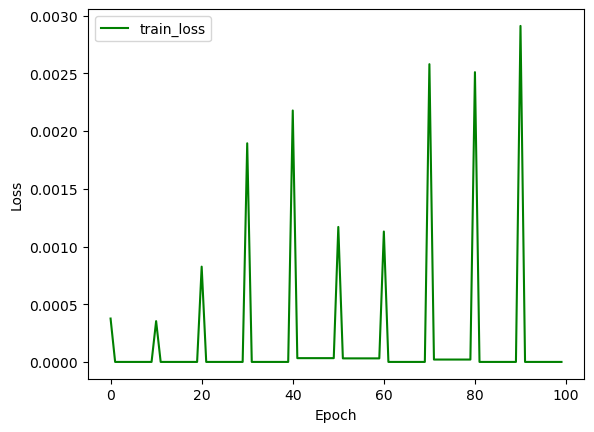

In [148]:
plt.plot(all_result, 'g', label='train_loss') 
#plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [149]:
print('Training Accuracy :', results['train_acc'][-1])
print('Test Accuracy :', results['test_acc'][-1])

Training Accuracy : 1.0
Test Accuracy : 0.8916666507720947


In [150]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print('Total trainable parameters :', params)

Total trainable parameters : 8960


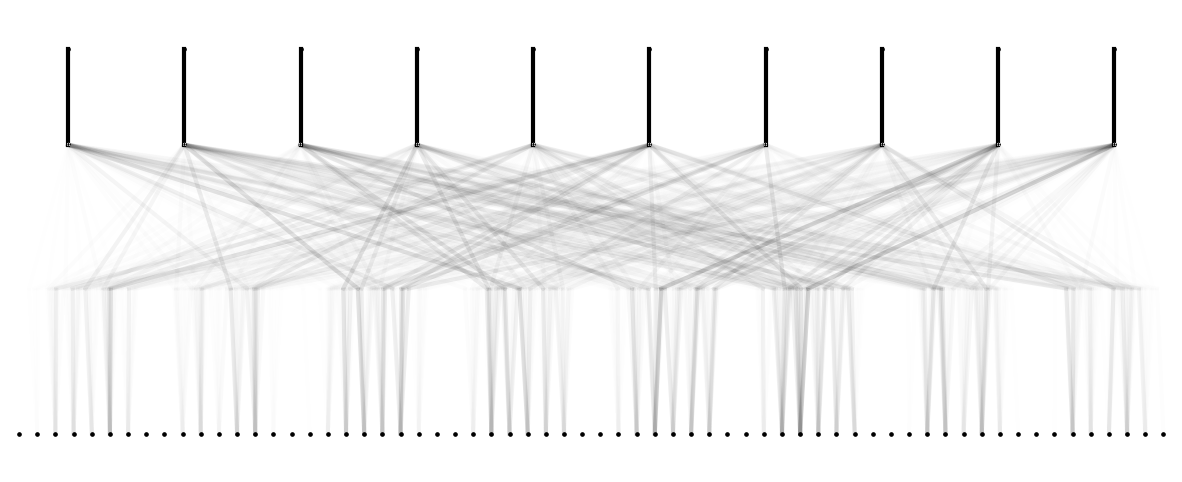

In [151]:
model.plot(scale=1.5)

# Implementation of a Neural Network for comparison

In [140]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(64, 64)  # 4 inputs to 5 hidden nodes
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(64, 10)  # 5 hidden nodes to 3 outputs

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    loss_list = []
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        loss_list.append(loss.item())
        # print(f'Epoch {epoch+1}, Loss: {loss.item()}')
    return loss_list

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

In [141]:
def load_dataset(dataset):
    # Create data loaders (optional, if you want to batch and shuffle the data)
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['train_input'], dataset['train_label']), batch_size=1000, shuffle=False)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(dataset['test_input'], dataset['test_label']), batch_size=1000, shuffle=False)

    return train_loader, test_loader


## Train and Evaluate the NN

In [154]:
%%time
N=200
model = NeuralNetwork().to(device)

CPU times: total: 0 ns
Wall time: 1 ms


In [155]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
all_loss=[]

for i in range(10):
    train_loader, test_loader = load_dataset(data_continual_learn(train_data, test_data, i))
    loss_list = train_model(model, train_loader, criterion, optimizer, num_epochs=N)
    all_loss.extend(loss_list)
    test_model(model, train_loader)
    test_model(model, test_loader)

C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 100.0%
Accuracy: 11.944444444444445%


C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 100.0%
Accuracy: 21.11111111111111%


C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 99.4475138121547%
Accuracy: 29.72222222222222%


C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 98.01980198019803%
Accuracy: 39.44444444444444%


C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 97.75784753363229%
Accuracy: 49.44444444444444%


C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 98.80952380952381%
Accuracy: 58.611111111111114%


C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 99.62121212121212%
Accuracy: 69.44444444444444%


C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 99.64539007092199%
Accuracy: 78.05555555555556%


C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 98.0327868852459%
Accuracy: 80.55555555555556%


C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\4033476979.py:9: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


Accuracy: 97.54601226993866%
Accuracy: 88.33333333333333%


Text(0, 0.5, 'Loss')

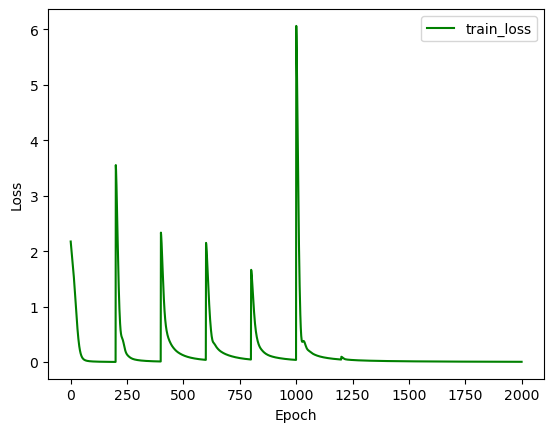

In [109]:
plt.plot(all_loss, 'g', label='train_loss') 
#plt.plot(range(N),results['test_loss'], 'y', label='validation_loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [110]:
train_x, train_y = Preprocessing(train_data)
test_x, test_y = Preprocessing(test_data)
dataset = {}
dataset['train_input'] = torch.tensor(train_x, dtype=torch.float32, device=device)
dataset['test_input'] = torch.tensor(test_x, dtype=torch.float32, device=device)
dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)
dataset['test_label'] = torch.tensor(test_y, dtype=torch.long, device=device)
train_loader, test_loader = load_dataset(dataset)

C:\Users\Windows\AppData\Local\Temp\ipykernel_12160\971413919.py:6: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dataset['train_label'] = torch.tensor(train_y, dtype=torch.long, device=device)


In [156]:
test_model(model, test_loader)

Accuracy: 88.33333333333333%


In [157]:
test_model(model, train_loader)

Accuracy: 97.54601226993866%


In [158]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

4810

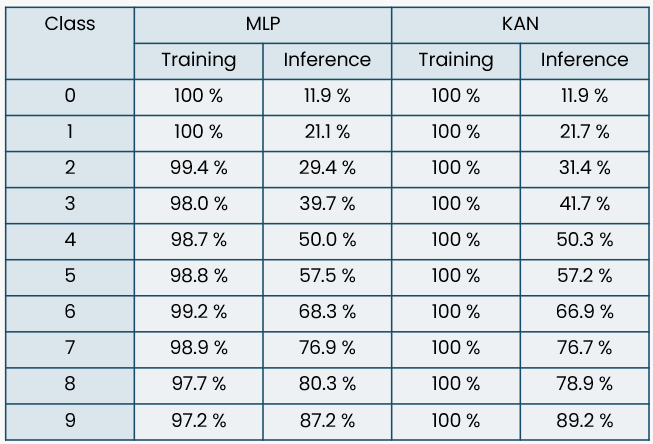

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: green; font-size:100%; text-align:left">

<h3 align="center"><font color='white'>💡 Summary from above :</font></h3>

The KAN and MLP models demonstrate limited accuracy in the context of Class incremental learning.